# **Calories Burned Prediction**

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collection & Processing**

In [ ]:
# loading the data from csv file to a Pandas DataFrame

# File ID extracted from  Google Drive link
file_id1 = "1lNmH3XRep-JEV8D7rN5g6kM9SMvPeXbf"
file_name1 = "calories.csv"

# Construct the download URL
url1 = f"https://drive.google.com/uc?id={file_id1}"

# Download the file
gdown.download(url1, file_name1, quiet=False)

# Load the dataset with pandas
calories = pd.read_csv(file_name1)


Downloading...
From: https://drive.google.com/uc?id=1lNmH3XRep-JEV8D7rN5g6kM9SMvPeXbf
To: /content/calories.csv
100%|██████████| 230k/230k [00:00<00:00, 68.5MB/s]


In [ ]:
#print the first 5 rows of the DataFrame
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
# loading the data from csv file to a Pandas DataFrame

# File ID extracted from  Google Drive link
file_id2 = "1sgqZr4h9m0sUAmq0BrOqAiDenkNcuU--"
file_name2 = "exercise.csv"

# Construct the download URL
url2 = f"https://drive.google.com/uc?id={file_id2}"

# Download the file
gdown.download(url2, file_name2, quiet=False)

# Load the dataset with pandas
exercise_data = pd.read_csv(file_name2)


Downloading...
From: https://drive.google.com/uc?id=1sgqZr4h9m0sUAmq0BrOqAiDenkNcuU--
To: /content/exercise.csv
100%|██████████| 677k/677k [00:00<00:00, 80.7MB/s]


In [ ]:
#print the first 5 rows of the DataFrame
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Combining the two DataFrames**

In [ ]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [ ]:
#print the first 5 rows of the DataFrame
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#Checking the numbers of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# Getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# Checking for missing values in "calories_data" DataFrame
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


**Data Analysis**

In [ ]:
# Get some statistical insights
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visualization**

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

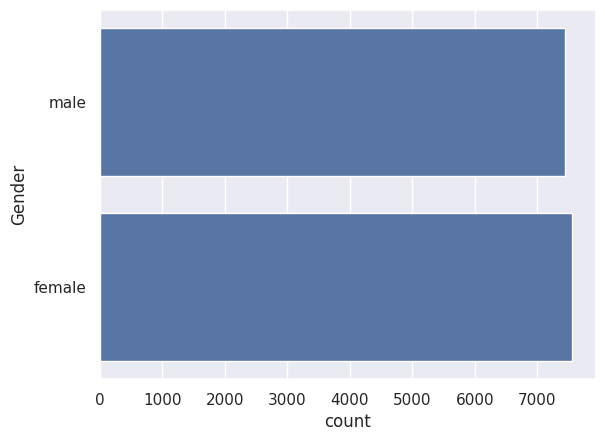

In [ ]:
sns.countplot(calories_data['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

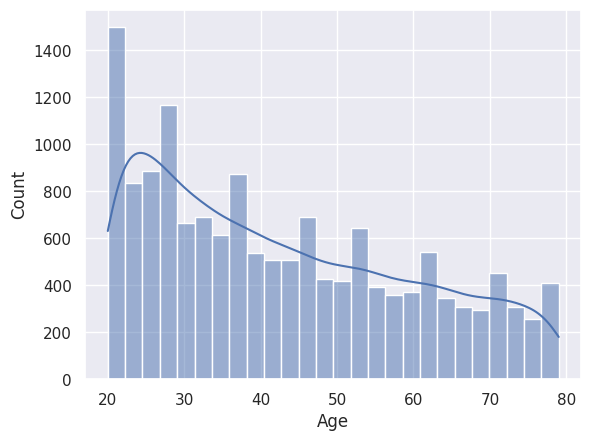

In [ ]:
# Finding the distribution of "Age" column
sns.histplot(calories_data['Age'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

<Axes: xlabel='Height', ylabel='Count'>

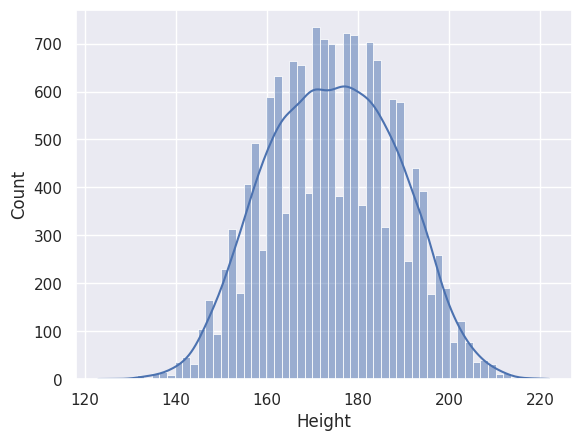

In [ ]:
# Finding the distribution of "Height" column
sns.histplot(calories_data['Height'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

<Axes: xlabel='Weight', ylabel='Count'>

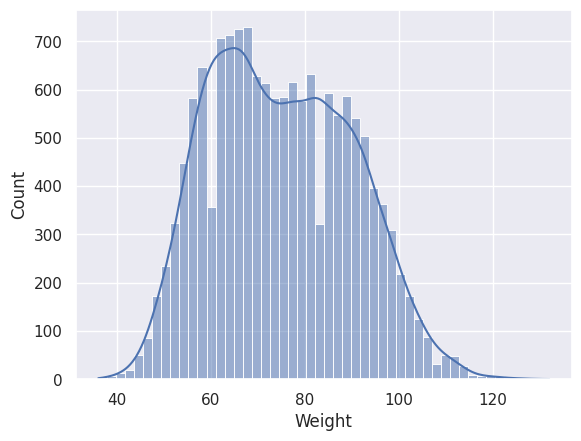

In [ ]:
# Finding the distribution of "Weight" column
sns.histplot(calories_data['Weight'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

<Axes: xlabel='Duration', ylabel='Count'>

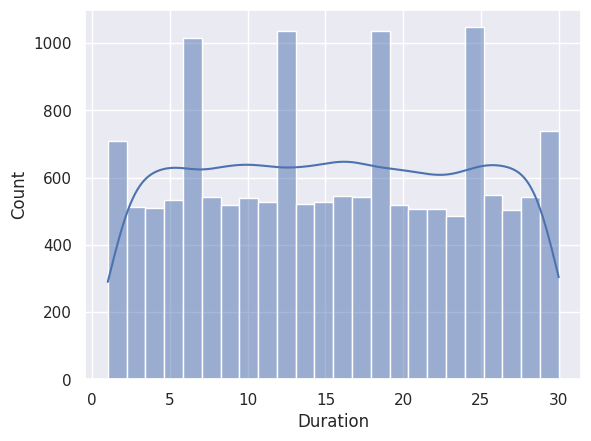

In [ ]:
# Finding the distribution of "Duration" column
sns.histplot(calories_data['Duration'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

<Axes: xlabel='Heart_Rate', ylabel='Count'>

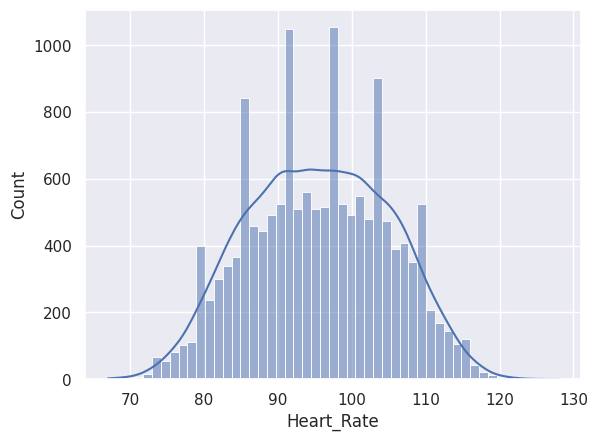

In [ ]:
# Finding the distribution of "Heart_Rate" column
sns.histplot(calories_data['Heart_Rate'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

<Axes: xlabel='Body_Temp', ylabel='Count'>

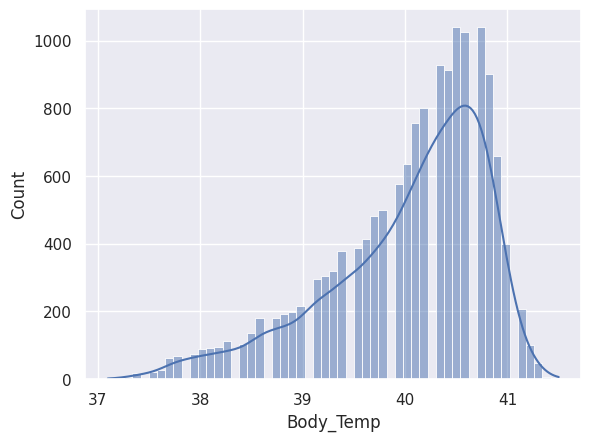

In [ ]:
# Finding the distribution of "Body_Temp" column
sns.histplot(calories_data['Body_Temp'], kde=True) #kde=Kernel Density Estimate to visualize the distribution trend

**Encoding :** Coverting categorical data into numerical data

In [ ]:
calories_data["Gender"] = calories_data["Gender"].map({'male': 0, 'female': 1})
print(calories_data)


        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0        

**Finding the Correlation in the Dataset**


1. Positive Correlation
2. Negative Correlation



In [ ]:
correlation = calories_data.corr()

<Axes: >

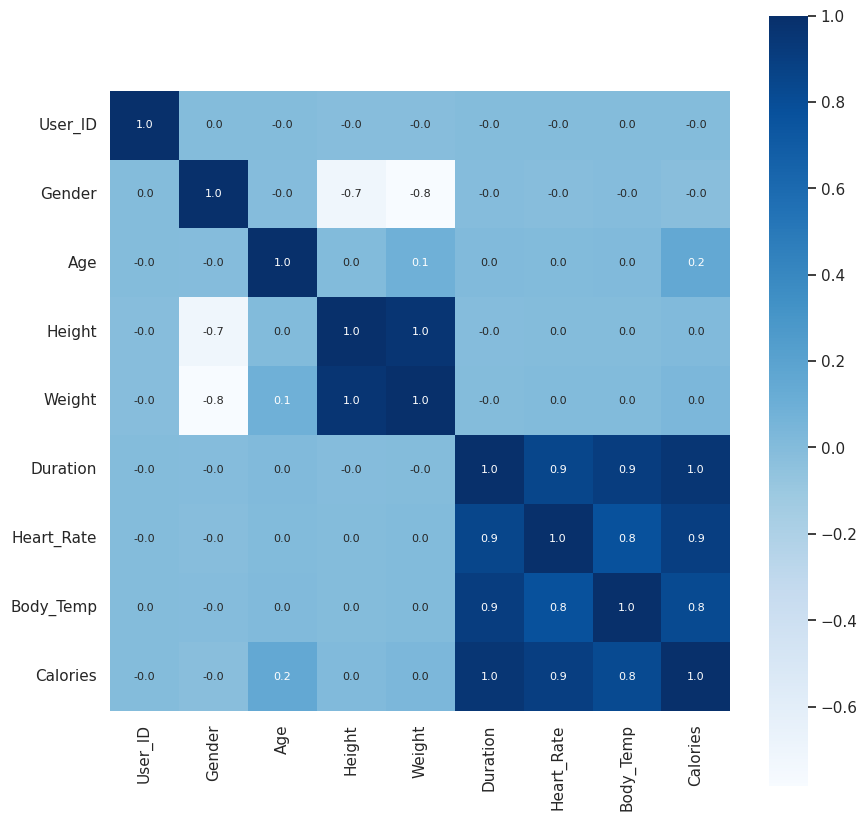

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')


#correlation:The data to be visualized. This should be a pandas DataFrame.
#cbar=True: Displays a color bar (legend) on the side, which helps interpret the strength of the correlation (from -1 to +1).
#square=True:Forces each cell of the heatmap to be square-shaped (equal width and height), making it visually cleaner for square matrices like correlation matrices.
#fmt='.1f':Sets the format for the annotation text inside each square. Here, .1f means "floating point with one decimal place".
#annot=True:Annotates each cell with the numeric value (i.e., the correlation coefficient) so you can see the exact values in addition to the color.
#annot_kws={'size':8}:Sets keyword arguments for annotations. Here, it's specifying the font size of the annotations.
#cmap='Blues':Specifies the color map (colormap) used to color the heatmap. 'Blues' gives a gradient of blue shades, with darker shades for higher correlation values.



 **Separating features & targets**

In [ ]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Splitting the data Training Data and Test Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# X_train: The feature set for training (80% of X).
# X_test: The feature set for testing (20% of X).
# Y_train: The target values for training (80% of Y).
# Y_test: The target values for testing (20% of Y).



In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(15000,) (12000,) (3000,)


**Model Training**

XGBoost Regressor

In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.4833678883314132


**Building a Predictive System**

In [ ]:
input_data=['female',31 ,187.0, 60.0, 28.0, 96.0, 40.8] #Args: Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp
if (input_data[0].lower()=='male'):
  input_data[0]=0
elif(input_data[0].lower()=='female'):
  input_data[0]=1
# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

In [ ]:
print("predicted calories burned =", prediction)

predicted calories burned = [145.39215]
